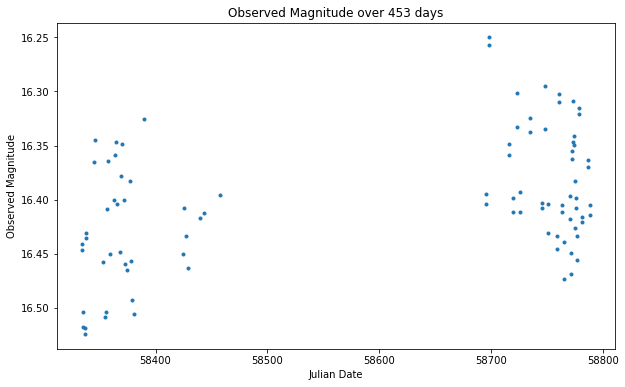

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.timeseries import LombScargle

# Reading in a lightcurve
csv = np.genfromtxt('Data/Lightcurves/star9.csv', delimiter = ',', skip_header = 1 )
lc = csv[:, (3, 4)]
mag_err = csv[:, 5]

# Time span of observations
span = lc[-1, 0] - lc[0, 0]

# Plotting the raw lightcurve
fig1 = plt.figure(figsize = (10, 6))
ax1 = plt.axes()
ax1.plot(lc[:, 0], lc[:, 1], '.' )
ax1.set_xlabel('Julian Date')
ax1.set_ylabel('Observed Magnitude')
ax1.set_title('Observed Magnitude over %i days' % (span) )
ax1.invert_yaxis()

<ipython-input-33-664702c426f6>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  best_period = periods[inc][ power_spectrum[inc] == power_spectrum[inc].max() ]


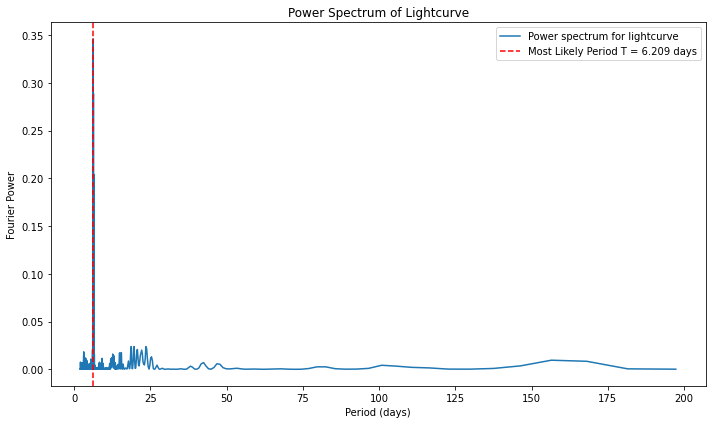

In [33]:
## Taking the fourier transform and choosing the most likely period
# Need to use Lomb-Scargle because the points are not at regular time-intervals
freqs, lc_ft = LombScargle(lc[:, 0], lc[:, 1]).autopower()
power_spectrum = lc_ft**2
periods = 1 / freqs

## Plotting the fourier transform
fig2 = plt.figure(figsize = (10, 6) )
ax2 = plt.axes()
ax2.plot(periods[periods < 200], power_spectrum[periods < 200], label = 'Power spectrum for lightcurve' )

## Choosing the best-fitting period
inc = [periods < 1000]

best_period = periods[inc][ power_spectrum[inc] == power_spectrum[inc].max() ]

# Plotting the best period as a line
ax2.axvline(best_period, ls = '--', c = 'r', label = 'Most Likely Period T = %.3f days' % (best_period))
ax2.legend()
ax2.set_xlabel('Period (days)')
ax2.set_ylabel('Fourier Power')
ax2.set_title('Power Spectrum of Lightcurve')
fig2.tight_layout()


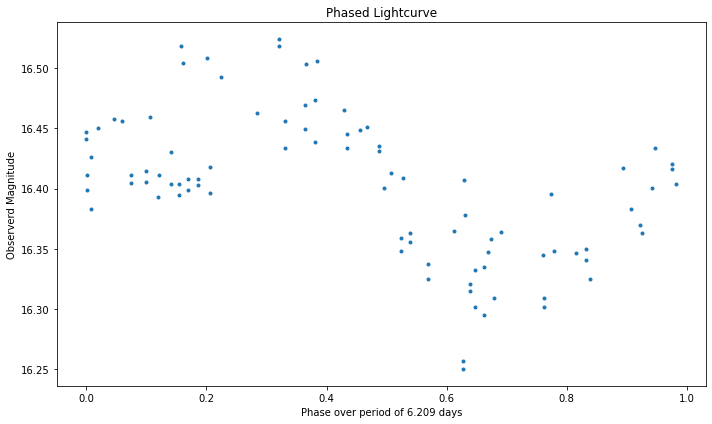

In [34]:
## Creating a phased plot for the lightcurve

def Phase(lc, period):
    '''
    This function calculates the phase at the time of an observation based on the given period.

    Inputs:
    lc = raw lightcurve with col 0 as julian date and col 1 as observed magnitude
    period = period to base phase off in days

    Returns:
    sorted_phased_lc = Phased lightcurve sorted by ascending phase with col 0 as phase and col 1 as observed magnitude
    '''
    epoch = lc[0, 0]

    phased_lc = np.zeros( (len(lc), 2) )
    for i, t in enumerate(lc[:, 0]):
        phase = ((t - epoch) / period) - int((t - epoch) / period)
        phased_lc[i, 0] = phase
        phased_lc[i, 1] = lc[i, 1]

    sorted_phased_lc = phased_lc[ np.argsort(phased_lc[:, 0]), : ]

    return sorted_phased_lc

# Get the phase of each observation
phased_lc = Phase(lc, best_period)

# Plotting the phased lightcurve
fig3 = plt.figure(figsize = (10, 6))
ax3 = plt.axes()

ax3.plot(phased_lc[:, 0], phased_lc[:, 1], '.')
ax3.set_title('Phased Lightcurve')
ax3.set_xlabel('Phase over period of %.3f days' % (best_period) )
ax3.set_ylabel('Observed Magnitude')

fig3.tight_layout()

